In [21]:
import numpy as np # --> Arrays Complex calculations
import pandas as pd # --> Pandas Data ni retrieve cheyadaniki paniki osthadhi
import matplotlib.pyplot as plt # --> Graphical representation 
import tensorflow as tf # --> used to build model

from tensorflow import keras 
from tensorflow.keras import layers # --> Algorithms

In [22]:
data_train_path = 'Classes/train'
data_test_path = 'Classes/test'
data_val_path = 'Classes/validation'

In [23]:
img_width = 180
img_height = 180

In [24]:
#converts images to numpy arrays form

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 10147 files belonging to 6 classes.


In [52]:
data_cat = data_train.class_names

In [53]:
data_cat

['Audi', 'Mahindra Scorpio', 'Rolls Royce', 'Toyota Innova', 'cats', 'dogs']

In [26]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3000 files belonging to 6 classes.


In [27]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3000 files belonging to 6 classes.


In [28]:
from tensorflow.keras.models import Sequential

In [29]:
# CNN NETWORK

model = Sequential([ # 0-255 --> 0-1
    layers.Rescaling(1./255), #
    # Layer 1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # Layer 2
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # Layer 3
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #Flattening 
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [30]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 109s 341ms/step - accuracy: 0.9380 - loss: 0.1577 - val_accuracy: 0.7307 - val_loss: 1.1164
Epoch 2/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 108s 340ms/step - accuracy: 0.9454 - loss: 0.1315 - val_accuracy: 0.7323 - val_loss: 1.1877
Epoch 3/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 109s 341ms/step - accuracy: 0.9483 - loss: 0.1297 - val_accuracy: 0.7223 - val_loss: 1.2787
Epoch 4/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 111s 349ms/step - accuracy: 0.9501 - loss: 0.1317 - val_accuracy: 0.7390 - val_loss: 1.2159
Epoch 5/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 109s 343ms/step - accuracy: 0.9606 - loss: 0.1059 - val_accuracy: 0.7173 - val_loss: 1.6007
Epoch 6/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 110s 345ms/step - accuracy: 0.9601 - loss: 0.1059 - val_accuracy: 0.7283 - val_loss: 1.3420
Epoch 7/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 115s 362ms/step - accuracy: 0.9641 - loss: 0.1064 - val_accuracy: 0.7447 - val_loss: 1.2673
Epoch 8/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 109s 342ms/step - accuracy: 0.9644 -

Text(0.5, 1.0, 'Loss')

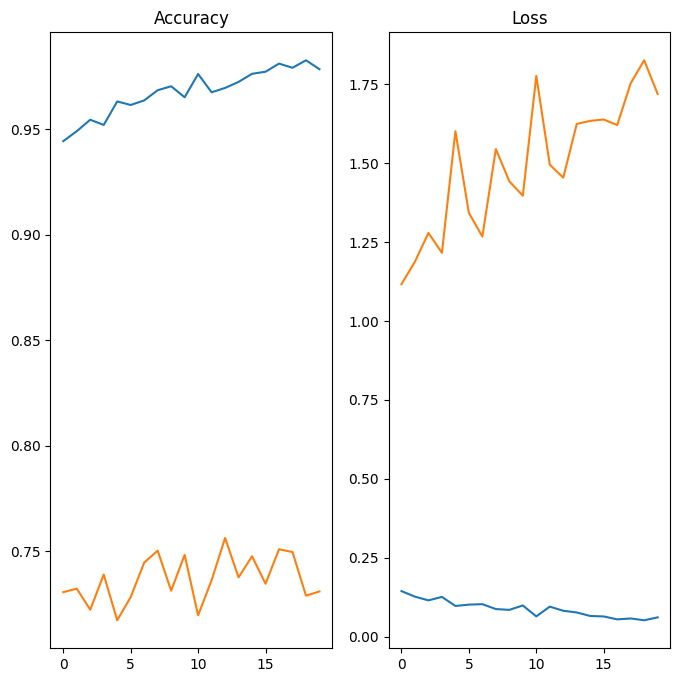

In [34]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, hist
ory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')


In [46]:
image = 'd1.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [47]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [48]:
score = tf.nn.softmax(predict)

In [49]:
print("Image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)], np.max(score)*100))

Image is dogs with accuracy of 100.00


In [50]:
model.save('Image_Classify.keras')